In [183]:
import numpy as np
import pandas as pd
idx = pd.IndexSlice
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Image, HTML

%pylab inline
pylab.rcParams['figure.figsize'] = (18, 5)

Populating the interactive namespace from numpy and matplotlib


In [176]:
df = pd.read_csv('../data/USDTZUSD-depth.csv', header=None)
s_to_ns = 1e9
df.rename(columns={0: 'time'}, inplace=True)
df['time'] = (df['time']*s_to_ns).astype('datetime64[ns]')
df.set_index(['time'], inplace=True)

n_cols = len(df.columns)
assert n_cols % 4 == 0
multicols = np.full([3, n_cols], '', dtype=object)
for i, col in enumerate(df.columns):
    multicols[0][i] = 'price' if i < n_cols//2 else 'volume'
    multicols[1][i] = 'buy' if i%(n_cols//2) < n_cols//4 else 'sell'
    multicols[2][i] = -((n_cols//4)-1 - i%(n_cols//4)) if i%(n_cols//2) < n_cols//4 else i % (n_cols//4)
df.columns = list(multicols)
df.sort_index(axis=1, inplace=True)

print(len(df))
with pd.option_context('display.max_columns', 500):
    display(df.tail(5))

779


price                                              \
                       buy                                               
                       -99     -98   -97     -96   -95     -94     -93   
time                                                                     
2018-12-02 10:27:46  0.097  0.1000  0.20  0.2001  0.21  0.2222  0.2500   
2018-12-02 10:28:52  0.200  0.2001  0.21  0.2222  0.25  0.2600  0.3001   
2018-12-02 10:29:55  0.200  0.2001  0.21  0.2222  0.25  0.2600  0.3001   
2018-12-02 10:29:55  0.097  0.1000  0.20  0.2001  0.21  0.2222  0.2500   
2018-12-02 10:29:55  0.097  0.1000  0.20  0.2001  0.21  0.2222  0.2500   

                                                                            \
                                                                             
                        -92     -91     -90   -89   -88   -87    -86   -85   
time                                                                         
2018-12-02 10:27:46  0.2600  0.3001  0.3333  0.34  0.46  0.48  0.500  0.51   
2018-12-02 10:28:52  0.3333  0.3400  0.4600  0.48  0.50  0.51  0.522  0.66   
2018-12-02 10:29:55  0.3333  0.3400  0.4600  0.48  0.50  0.51  0.522  0.66   
2018-12-02 10:29:55  0.2600  0.3001  0.3333  0.34  0.46  0.48  0.500  0.51   
2018-12-02 10:29:55  0.2600  0.3001  0.3333  0.34  0.46  0.48  0.500  0.51   

                                                                              \
                                                                               
                       -84   -83   -82     -81    -80     -79    -78     -77   
time                                                                           
2018-12-02 10:27:46  0.522  0.66  0.70  0.7700  0.810  0.8107  0.825  0.8300   
2018-12-02 10:28:52  0.700  0.77  0.81  0.8107  0.825  0.8300  0.850  0.8507   
2018-12-02 10:29:55  0.700  0.77  0.81  0.8107  0.825  0.8300  0.850  0.8507   
2018-12-02 10:29:55  0.522  0.66  0.70  0.7700  0.810  0.8107  0.825  0.8300   
2018-12-02 10:29:55  0.522  0.66  0.70  0.7700  0.810  0.8107  0.825  0.8300   

                                                                          \
                                                                           
                       -76     -75     -74   -73     -72     -71     -70   
time                                                                       
2018-12-02 10:27:46  0.850  0.8507  0.8510  0.86  0.8689  0.8700  0.8765   
2018-12-02 10:28:52  0.851  0.8600  0.8689  0.87  0.8765  0.8777  0.8800   
2018-12-02 10:29:55  0.851  0.8600  0.8689  0.87  0.8765  0.8777  0.8800   
2018-12-02 10:29:55  0.850  0.8507  0.8510  0.86  0.8689  0.8700  0.8765   
2018-12-02 10:29:55  0.850  0.8507  0.8510  0.86  0.8689  0.8700  0.8765   

                                                                         \
                                                                          
                        -69     -68   -67     -66    -65    -64     -63   
time                                                                      
2018-12-02 10:27:46  0.8777  0.8800  0.89  0.8901  0.900  0.901  0.9080   
2018-12-02 10:28:52  0.8900  0.8901  0.90  0.9010  0.908  0.910  0.9107   
2018-12-02 10:29:55  0.8900  0.8901  0.90  0.9010  0.908  0.910  0.9107   
2018-12-02 10:29:55  0.8777  0.8800  0.89  0.8901  0.900  0.901  0.9080   
2018-12-02 10:29:55  0.8777  0.8800  0.89  0.8901  0.900  0.901  0.9080   

                                                                         \
                                                                          
                       -62     -61    -60     -59    -58     -57    -56   
time                                                                      
2018-12-02 10:27:46  0.910  0.9107  0.911  0.9156  0.920  0.9201  0.921   
2018-12-02 10:28:52  0.911  0.9156  0.920  0.9201  0.921  0.9250  0.930   
2018-12-02 10:29:55  0.911  0.9156  0.920  0.9201  0.921  0.9250  0.930   
2018-12-02 10:29:55  0.910  0.9107  0.911  0

In [188]:
def calc_cum_vol(df):
#     df = df.loc[:, idx[:,:,:4]].iloc[:4]
    cumvol = df.loc[:, idx['volume', :, :]].rename(columns={'volume': 'cumvol'}, level=0)
    cumvol['cumvol', 'buy'] = cumvol['cumvol', 'buy'].iloc[:, ::-1].cumsum(axis=1).iloc[:, ::-1]
    cumvol['cumvol', 'sell'] = cumvol['cumvol', 'sell'].cumsum(axis=1)
    df = pd.concat([df, cumvol], axis=1)
    return df

depths = calc_cum_vol(df)

(779, 200) (779, 200) (779, 200)


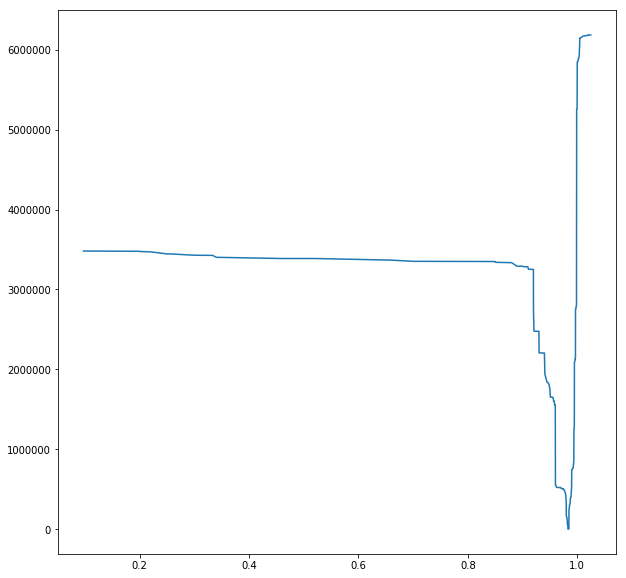

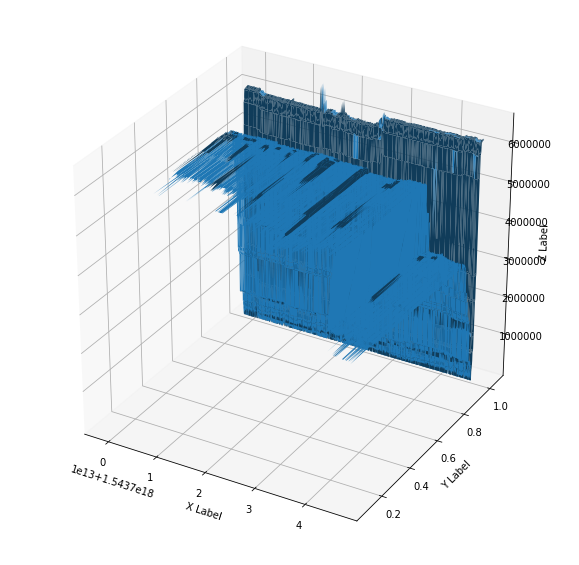

In [196]:
p = depths
Y = depths['price'].values
Z = depths['cumvol'].values
X = depths.index.values.reshape(-1, 1).repeat(Y.shape[1], axis=1).astype(int)

print(X.shape, Y.shape, Z.shape)
fig, ax = plt.subplots(figsize=[10,10])
ax.plot(Y[-1], Z[-1])

fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [134]:
df = pd.DataFrame(np.arange(12).reshape(3,-1))
df.columns = [['A', 'A', 'B', 'B'], [0, 1, 0, 1]]
print(df)
# df.loc[:, slice('C', None)] = df['B']


   A      B    
   0  1   0   1
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11


ValueError: Wrong number of items passed 2, placement implies 1